In [4]:
# Basic data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP / Hugging Face
from transformers import pipeline

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [13]:
# Replace with your dataset path (comments dataset or climate indicators)
df = pd.read_csv("climate_data.csv")

# Preview
print(df.shape)
df.head()


(522, 5)


,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [14]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


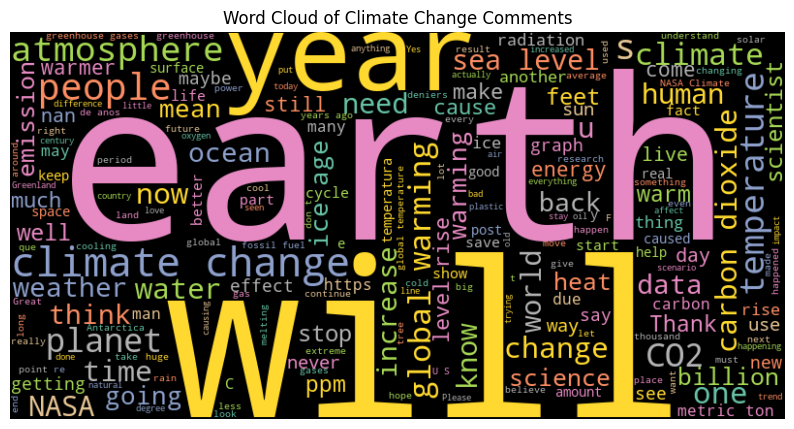

In [21]:
text_data = " ".join(comment for comment in df['text'].astype(str))
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='black',
    colormap='Set2'   # pastel-like colors
).generate(text_data)



plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Climate Change Comments")
plt.show()


In [2]:
# 1. Install dependencies (run this only once)
# !pip install transformers torch --upgrade

# 2. Import libraries
import torch                      # <-- this is the missing import
import pandas as pd
from transformers import pipeline

# 3. Load your dataset (replace with your file name/path)
df = pd.read_csv("climate_data.csv")

print("Dataset loaded successfully ✅")
print(df.head())

# 4. Load Hugging Face sentiment analysis model
sentiment_model = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",  # Pretrained model
    device=0 if torch.cuda.is_available() else -1             # GPU if available
)

# 5. Apply sentiment model to the 'Text' column
df['Sentiment'] = df['text'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['label']    # POSITIVE / NEGATIVE
)
df['Sentiment_Score'] = df['text'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['score']    # confidence score
)

# 6. Preview results
print(df[['text','Sentiment','Sentiment_Score']].head())

# 7. Save new dataset with sentiment
df.to_csv("climate_with_sentiment.csv", index=False)
print("✅ Sentiment analysis complete. File saved as climate_with_sentiment.csv")


Dataset loaded successfully ✅
                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, a

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

C:\Users\hpdem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hpdem\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


                                                text Sentiment  \
0  Neat comparison I have not heard it before.\n ...  POSITIVE   
1  An excellent way to visualise the invisible! T...  POSITIVE   
2  Does the CO2/ghg in the troposphere affect the...  NEGATIVE   
3  excellent post! I defo feel the difference - o...  POSITIVE   
4  Yes, and carbon dioxide does not harm the Eart...  NEGATIVE   

   Sentiment_Score  
0         0.990374  
1         0.999859  
2         0.969834  
3         0.979372  
4         0.914198  
✅ Sentiment analysis complete. File saved as climate_with_sentiment.csv


C:\Users\hpdem\AppData\Local\Temp\ipykernel_3064\1448151371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='coolwarm')


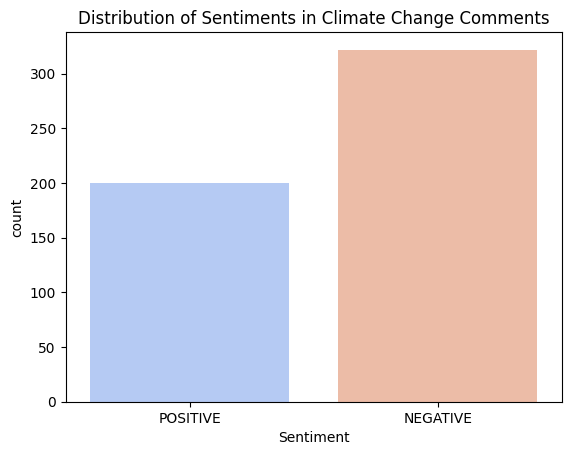

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title("Distribution of Sentiments in Climate Change Comments")
plt.show()


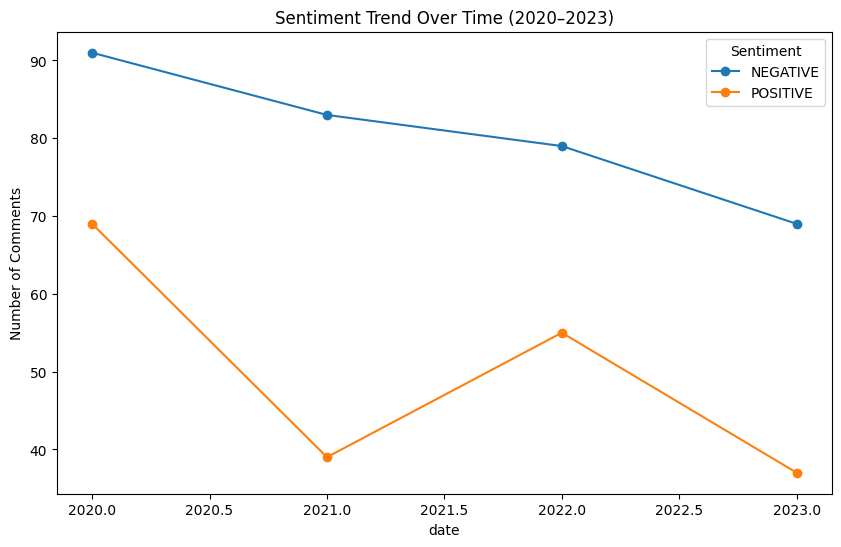

In [9]:
df['date'] = pd.to_datetime(df['date'])
sentiment_trend = df.groupby([df['date'].dt.year, 'Sentiment']).size().unstack().fillna(0)

sentiment_trend.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Sentiment Trend Over Time (2020–2023)")
plt.ylabel("Number of Comments")
plt.show()


C:\Users\hpdem\AppData\Local\Temp\ipykernel_3064\183185936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='likesCount', data=df, estimator=np.mean, palette='viridis')


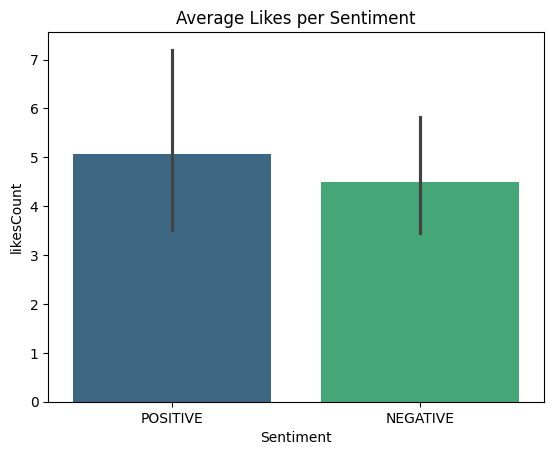

In [12]:
import numpy as np
sns.barplot(x='Sentiment', y='likesCount', data=df, estimator=np.mean, palette='viridis')
plt.title("Average Likes per Sentiment")
plt.show()
